In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = np.array([[0,1], [1, 0],[1,1],[0,0]])
y = np.array([[1],[1],[0], [0]])

In [3]:
num_input = 2
num_hidden = 5
num_output = 1

In [4]:
Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))

In [5]:
Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))

In [6]:
def sigmoid(z): return 1 / (1 + np.exp(-z))

In [7]:
def sigmoid_derivative(z): return np.exp(-z) / (1 + np.exp(-z))**2

In [8]:
def forward(x, Wxh, Why):
    z1 = np.dot(x, Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1, Why) + by
    y_hat = sigmoid(z2)
    
    return z1, a1, z2, y_hat

In [13]:
def backward(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y - y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy

In [14]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    
    return J

In [15]:
alpha = 0.01
num_iterations = 5000

cost = []

for i in range(num_iterations):
    z1, a1, z2, y_hat = forward(X, Wxh, Why)
    dJ_dWxh, dJ_dWhy = backward(y_hat, z1, a1, z2)
    
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    
    c = cost_function(y, y_hat)
    
    cost.append(c)

Text(0, 0.5, 'Cost')

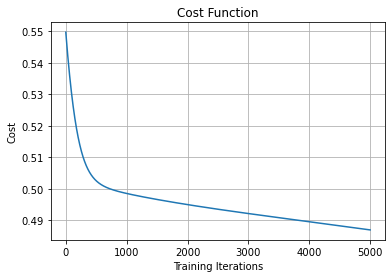

In [17]:
plt.grid()
plt.plot(range(num_iterations), cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')